In [1]:
from scipy.stats import weibull_min, beta, norm, truncnorm
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# x axis values
x = np.linspace(-5, 80, 50_000)
deltax = x[1] - x[0]

# a normal car has a distribution of lifetimes w0
w0 = weibull_min(c=2, loc=0, scale=12)
pdf = w0.pdf(x)

# Car age distribution

Text(0, 0.5, 'Probability density')

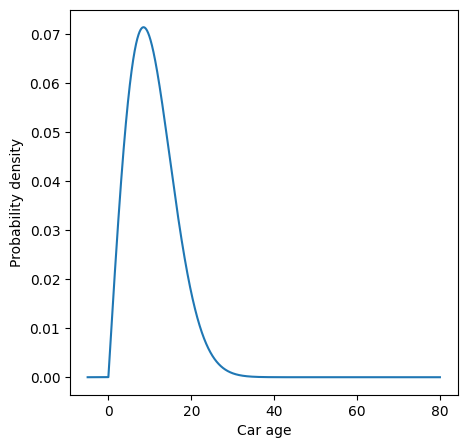

In [3]:
plt.figure(figsize=(5, 5))
plt.plot(x, pdf)
plt.xlabel("Car age")
plt.ylabel("Probability density")

# Expected lifetime after age $T$ 

In [4]:
def expected_lifespan_updated(age):
    idx = x>=age
    new_pdf = pdf[idx]
#     normalization = 1 - w0.cdf(age)
    normalization = sum(new_pdf * deltax)
    new_pdf = new_pdf / normalization
    expected_value = sum(new_pdf * x[idx] * deltax)
    return expected_value

In [5]:
ev = []
xx = np.linspace(0, 40, 100)
for T in tqdm(xx):
    ev.append(expected_lifespan_updated(age=T))

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Expected lifetime')

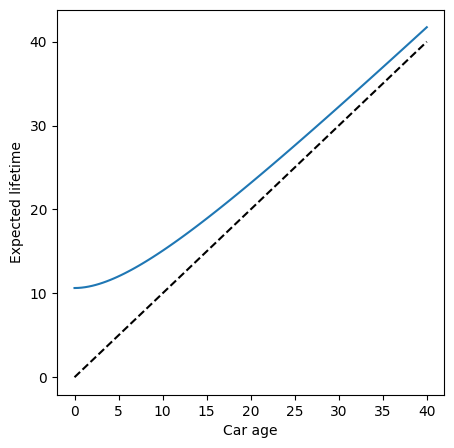

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(xx, ev)
plt.plot(xx, xx, 'k--')
plt.xlabel("Car age")
plt.ylabel("Expected lifetime")

# Optimize cost

In [7]:
def car_price(age):
    return 20_000 * np.exp(-np.log(2) / 2 * age) + 1000

def total_cost(t):
    return 60 / (expected_lifespan_updated(t) - t) * car_price(t)

In [8]:
tc = []
ages = np.linspace(0, 70, 100)
for t in tqdm(ages):
    tc.append(total_cost(t))

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Cost of cars during your life')

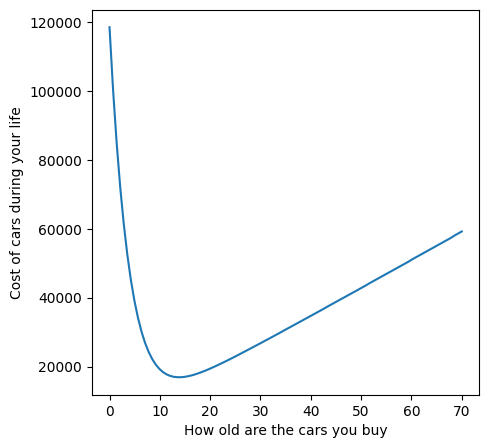

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(ages,tc)
plt.xlabel("How old are the cars you buy")
plt.ylabel("Cost of cars during your life")
# plt.savefig("../../docs/used-car/age-vs-cost.svg", bbox_inches='tight', transparent=True)

In [10]:
ages[np.argmin(tc)]

14.141414141414142